In [1]:
#import everything needed for all 4 steps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from pandas import Series, DataFrame

In [24]:
df = DataFrame()
df = pd.read_excel('/Users/jtpilling/Downloads/NBA Shots.xlsx')
#remove unwanted classes(unused) and columns 
df = df[df.Pos != 'F']
df = df[df.Pos != 'G']
df = df.drop(['Player'], axis=1)
df = df.drop(['Rk'], axis=1)

In [3]:
dfx = df.drop(columns =['Pos'])
sy = df.Pos

In [4]:
dfx_train, dfx_test, sy_train, sy_test = train_test_split(dfx, sy)

In [5]:
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)

In [6]:
y1_train = le.transform(sy_train)

n1 = preprocessing.MinMaxScaler()
n1 = n1.fit(dfx_train.to_numpy())

x1_train = n1.transform(dfx_train.to_numpy())

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1 = knn1.fit(x1_train, y1_train)

y1_test = le.transform(sy_test.to_numpy())

x1_test = n1.transform(dfx_test.to_numpy())

In [7]:
#test k accuracy
knn1.score(x1_test, y1_test)

0.19298245614035087

In [8]:
knn1.score(x1_train, y1_train)

0.9560117302052786

In [9]:
#print the value of the k
data1 = DataFrame()
for i in range(1,342):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1 = knn1.fit(x1_train, y1_train)
    print("The value of k is: ", i)
    print("The train accuracy is: ", knn1.score(x1_train, y1_train))
    print("The test accuracy is: ", knn1.score(x1_test, y1_test))
    print("\n")
#each time the loop runs store the value of k, the accuracy of the training set, and the accuracy of the test set in a new dataframe
    data1 = data1.append({"k": i, "train": knn1.score(x1_train, y1_train), "test": knn1.score(x1_test, y1_test)}, ignore_index=True)
data1

The value of k is:  1
The train accuracy is:  0.9560117302052786
The test accuracy is:  0.19298245614035087


The value of k is:  2
The train accuracy is:  0.6217008797653959
The test accuracy is:  0.2543859649122807


The value of k is:  3
The train accuracy is:  0.5571847507331378
The test accuracy is:  0.2719298245614035


The value of k is:  4
The train accuracy is:  0.5425219941348973
The test accuracy is:  0.30701754385964913


The value of k is:  5
The train accuracy is:  0.5278592375366569
The test accuracy is:  0.34210526315789475


The value of k is:  6
The train accuracy is:  0.4838709677419355
The test accuracy is:  0.2719298245614035


The value of k is:  7
The train accuracy is:  0.47214076246334313
The test accuracy is:  0.3157894736842105


The value of k is:  8
The train accuracy is:  0.4574780058651026
The test accuracy is:  0.32456140350877194


The value of k is:  9
The train accuracy is:  0.4633431085043988
The test accuracy is:  0.2982456140350877


The value of k

,k,test,train
0,1.0,0.192982,0.956012
1,2.0,0.254386,0.621701
2,3.0,0.271930,0.557185
3,4.0,0.307018,0.542522
4,5.0,0.342105,0.527859
...,...,...,...
336,337.0,0.210526,0.237537
337,338.0,0.210526,0.237537
338,339.0,0.210526,0.237537
339,340.0,0.210526,0.237537


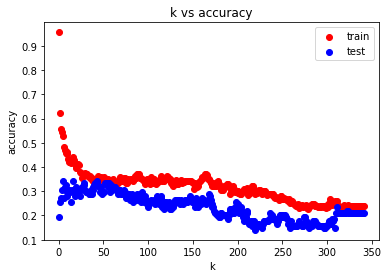

In [10]:
colors = ['red', 'blue']
data_k1 = data1.k
data_train1 = data1.train
data_test1 = data1.test

#create a scatter plot with df_k on the x axis and df_train and df_test on the y axis
plt.scatter(data_k1, data_train1, color=colors[0])
plt.scatter(data_k1, data_test1, color=colors[1])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('k vs accuracy')
plt.legend(['train', 'test'])
plt.show()

In [11]:
#recreate variables using 'Standard Scaler'
y2_train = le.transform(sy_train)

n2 = preprocessing.StandardScaler()
n2 = n2.fit(dfx_train.to_numpy())

x2_train = n2.transform(dfx_train.to_numpy())

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2 = knn2.fit(x2_train, y2_train)

y2_test = le.transform(sy_test.to_numpy())

x2_test = n2.transform(dfx_test.to_numpy())

In [12]:
#print the value of the k
data2 = DataFrame()
for i in range(1,342):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2 = knn2.fit(x2_train, y2_train)
    print("The value of k is: ", i)
    print("The train accuracy is: ", knn2.score(x2_train, y2_train))
    print("The test accuracy is: ", knn2.score(x2_test, y2_test))
    print("\n")
#each time the loop runs store the value of k, the accuracy of the training set, and the accuracy of the test set in a new dataframe
    data2 = data2.append({"k": i, "train": knn2.score(x2_train, y2_train), "test": knn2.score(x2_test, y2_test)}, ignore_index=True)
data2

The value of k is:  1
The train accuracy is:  0.9560117302052786
The test accuracy is:  0.23684210526315788


The value of k is:  2
The train accuracy is:  0.6275659824046921
The test accuracy is:  0.2631578947368421


The value of k is:  3
The train accuracy is:  0.5542521994134897
The test accuracy is:  0.2894736842105263


The value of k is:  4
The train accuracy is:  0.5542521994134897
The test accuracy is:  0.32456140350877194


The value of k is:  5
The train accuracy is:  0.5219941348973607
The test accuracy is:  0.3508771929824561


The value of k is:  6
The train accuracy is:  0.5043988269794721
The test accuracy is:  0.3333333333333333


The value of k is:  7
The train accuracy is:  0.4868035190615836
The test accuracy is:  0.3157894736842105


The value of k is:  8
The train accuracy is:  0.4750733137829912
The test accuracy is:  0.3157894736842105


The value of k is:  9
The train accuracy is:  0.45454545454545453
The test accuracy is:  0.3157894736842105


The value of k i

,k,test,train
0,1.0,0.236842,0.956012
1,2.0,0.263158,0.627566
2,3.0,0.289474,0.554252
3,4.0,0.324561,0.554252
4,5.0,0.350877,0.521994
...,...,...,...
336,337.0,0.210526,0.237537
337,338.0,0.210526,0.237537
338,339.0,0.210526,0.237537
339,340.0,0.210526,0.237537


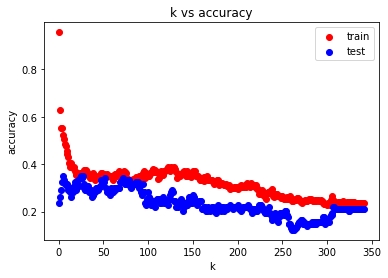

In [13]:
colors = ['red', 'blue']
data_k2 = data2.k
data_train2 = data2.train
data_test2 = data2.test

#create a scatter plot with df_k on the x axis and df_train and df_test on the y axis
plt.scatter(data_k2, data_train2, color=colors[0])
plt.scatter(data_k2, data_test2, color=colors[1])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('k vs accuracy')
plt.legend(['train', 'test'])
plt.show()


The K-Value that led to the highest "training" accuracy was K=1 when using the Min-Max Scaler

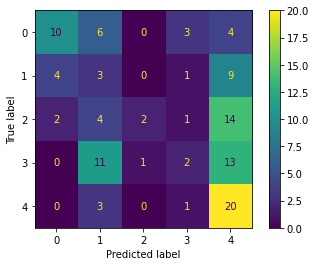

In [22]:
#Produce a Confusion Matrix for the 'Min-Max Scaler' data
clf = SVC(random_state=0)
clf.fit(x2_train, y2_train)

predictions = clf.predict(x2_test)
cm = confusion_matrix(y2_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [20]:
new_example_rawdata = np.array([[0.5,0.7,0.4,0.9]])
x_new = n1.transform(new_example_rawdata)
le.inverse_transform(knn2.predict(x_new))

array(['SG'], dtype=object)